In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5ou3zou0 because the default path (/home/matmozaur/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [12]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',
                   index_col='date', parse_dates=True)

In [13]:
pd.set_option('display.max_columns', None)
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-27,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-28,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [29]:
columns = ['location', 'total_cases', 'new_cases', 'total_deaths',
           'new_deaths', 'total_cases_per_million', 'new_cases_per_million','total_deaths_per_million',
           'new_deaths_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
           'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate',
           'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
           'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
           'people_fully_vaccinated_per_hundred']

In [30]:
data=data[columns]

In [31]:
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
count,7.391800e+04,73916.000000,6.467900e+04,64837.000000,73515.000000,73513.000000,64289.000000,64447.000000,1261.000000,1261.000000,3.416500e+04,3.394500e+04,33945.000000,34165.000000,37720.000000,37141.000000,4.052000e+03,3.602000e+03,2.391000e+03,3.420000e+03,4052.000000,3602.000000,2391.000000
mean,6.586969e+05,5173.069173,1.945251e+04,132.013156,7825.219264,67.051926,183.649049,1.400861,3643.116618,105.158695,3.832119e+04,4.727604e+06,171.593660,1.545201,0.087965,163.718128,5.205930e+06,3.769438e+06,1.768423e+06,2.062774e+05,8.001098,5.826549,3.189105
std,4.626117e+06,32293.280936,1.139178e+05,722.658454,15386.802301,168.758418,326.592757,3.873180,11486.415464,223.195882,1.485276e+05,2.199413e+07,356.768253,4.303574,0.099404,884.886763,2.601291e+07,1.656438e+07,7.251441e+06,9.096138e+05,16.054460,10.530765,7.012777
min,1.000000e+00,-74347.000000,1.000000e+00,-1918.000000,0.001000,-2153.437000,0.001000,-76.445000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-23.010000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,7.220000e+02,2.000000,3.800000e+01,0.000000,151.430000,0.141000,5.716000,0.000000,40.499000,7.867000,1.304000e+03,1.019370e+05,8.582000,0.105000,0.015000,7.900000,3.522175e+04,3.315775e+04,1.891300e+04,2.430250e+03,0.587500,0.580000,0.330000
50%,8.176000e+03,60.000000,2.540000e+02,2.000000,1091.636000,6.431000,31.434000,0.106000,326.737000,32.657000,4.899000e+03,4.923370e+05,41.520000,0.474000,0.052000,18.700000,2.466780e+05,2.248285e+05,1.207250e+05,1.380500e+04,2.900000,2.600000,1.250000
75%,8.798500e+04,676.000000,2.420000e+03,16.000000,7279.177000,57.512000,195.790000,1.164000,1532.550000,114.031000,1.895900e+04,2.059203e+06,173.599000,1.528000,0.125000,60.300000,1.427536e+06,1.135099e+06,5.813445e+05,7.408150e+04,7.820000,5.940000,2.810000
max,1.202181e+08,880902.000000,2.660456e+06,17895.000000,146107.552000,8652.658000,2268.843000,218.329000,116363.000000,2656.911000,2.945871e+06,3.476541e+08,3657.785000,327.086000,0.742000,44258.700000,3.813419e+08,2.257668e+08,8.558947e+07,1.663814e+07,140.130000,87.950000,52.180000


In [32]:
def analyse_country(data, country):
    data_country = data[data['location']==country]
    data_country.drop('location', axis=1, inplace=True)
    for c in data_country.columns:
        print(c)
        plt.figure(figsize=(15,5))
        plt.plot(data_country[c], 'b.')
        plt.grid()
        plt.show()
        print('\n\n')

total_cases


/home/matmozaur/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


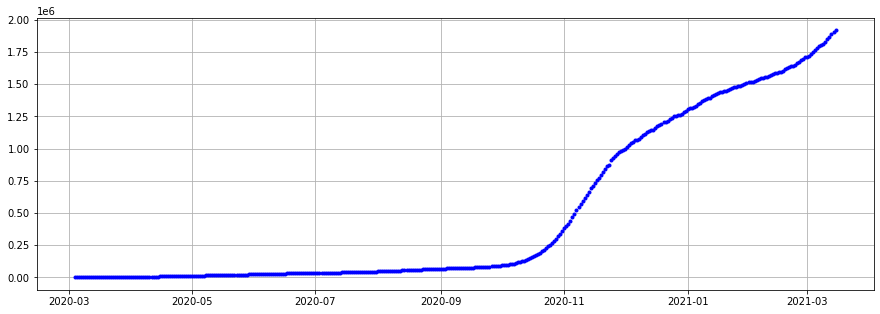




new_cases


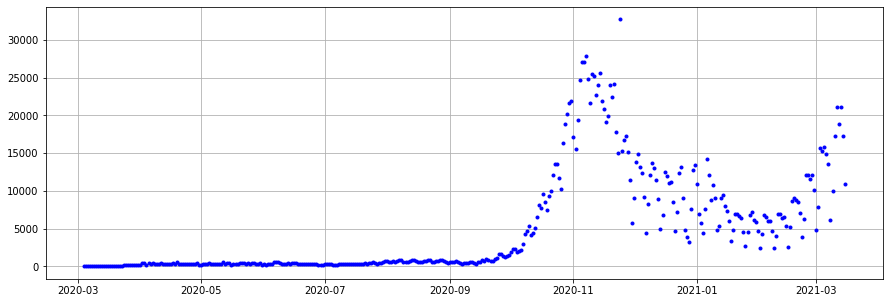




total_deaths


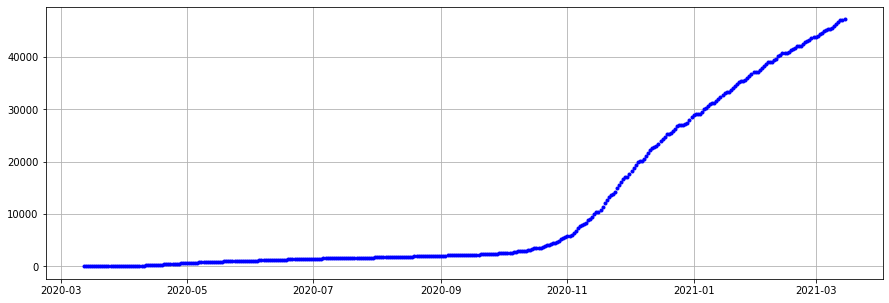




new_deaths


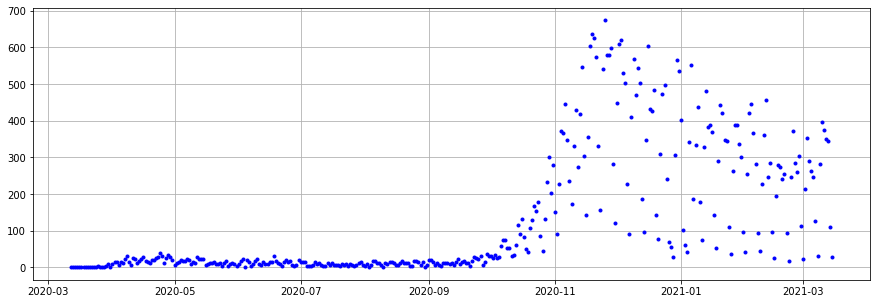




total_cases_per_million


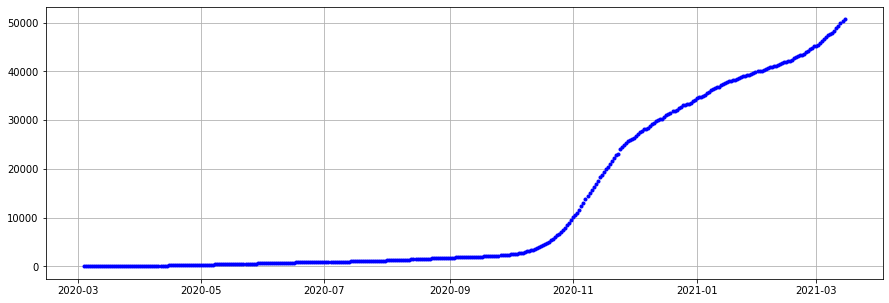




new_cases_per_million


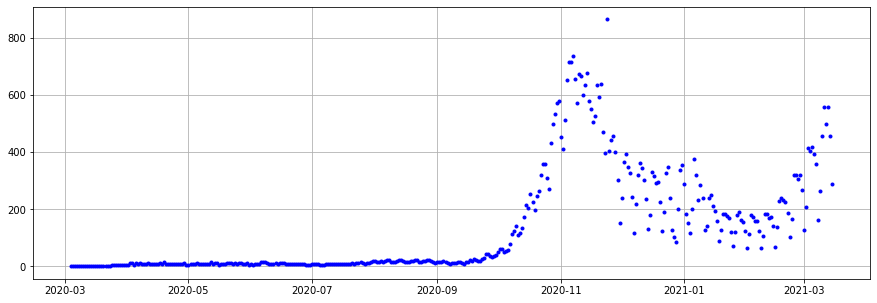




total_deaths_per_million


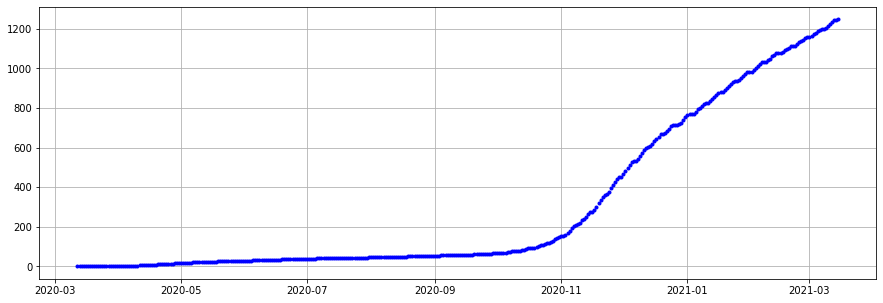




new_deaths_per_million


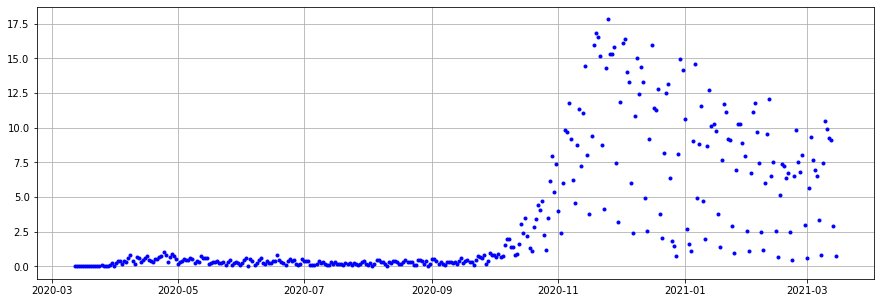




weekly_hosp_admissions


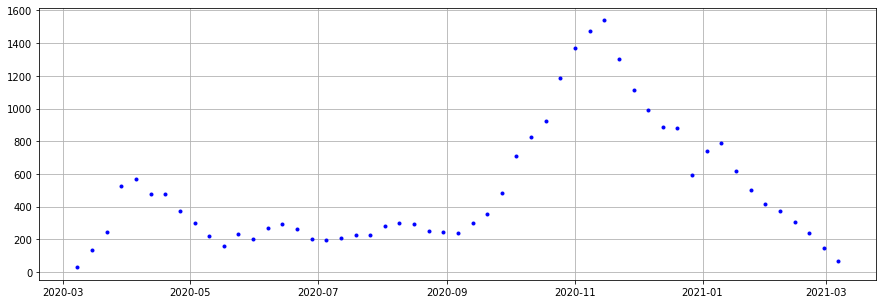




weekly_hosp_admissions_per_million


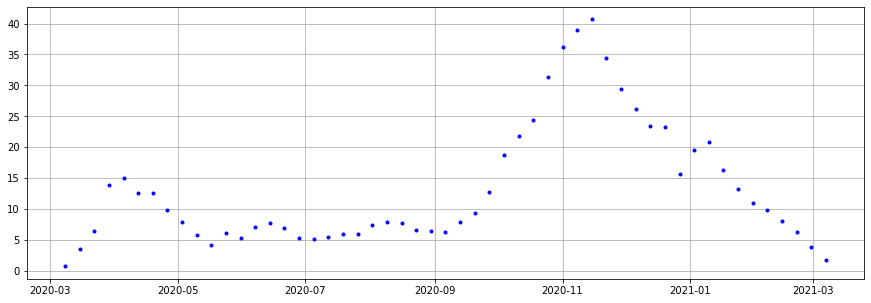




new_tests


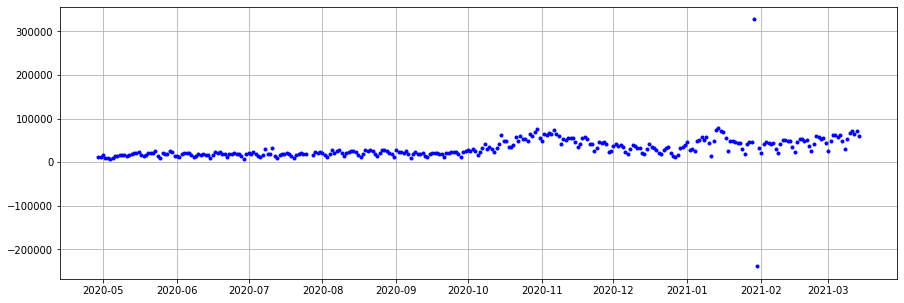




total_tests


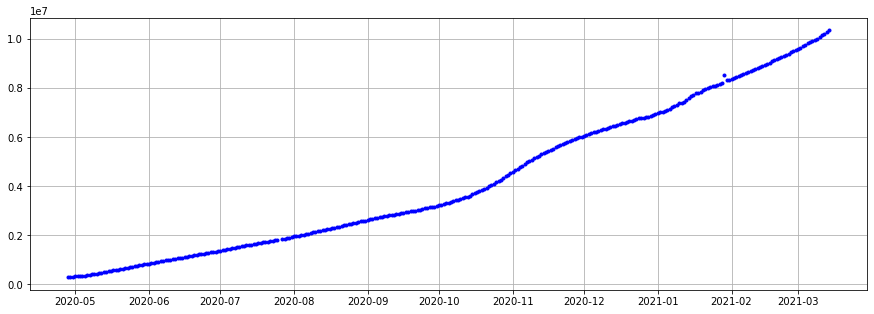




total_tests_per_thousand


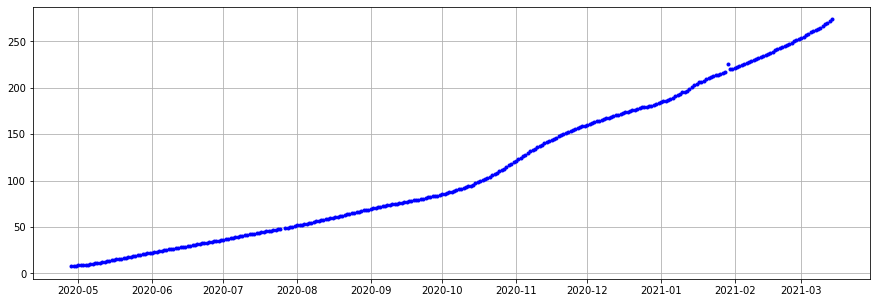




new_tests_per_thousand


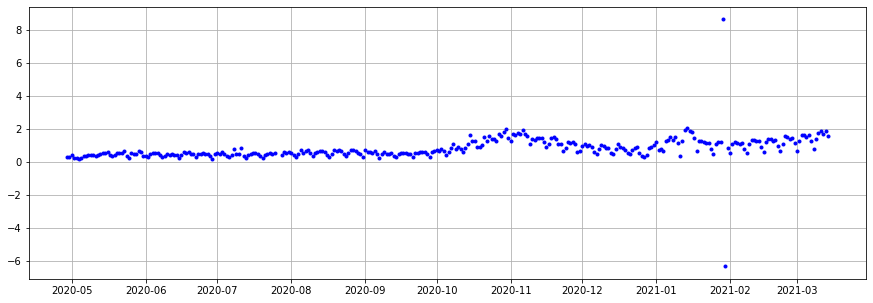




positive_rate


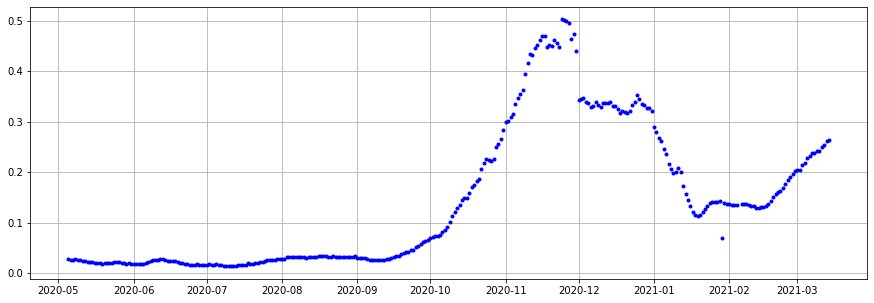




tests_per_case


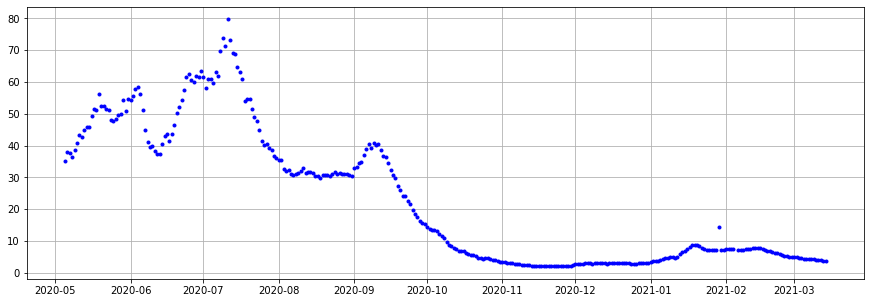




total_vaccinations


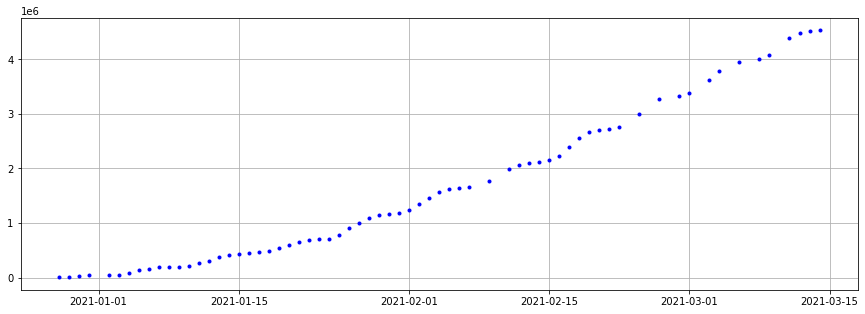




people_vaccinated


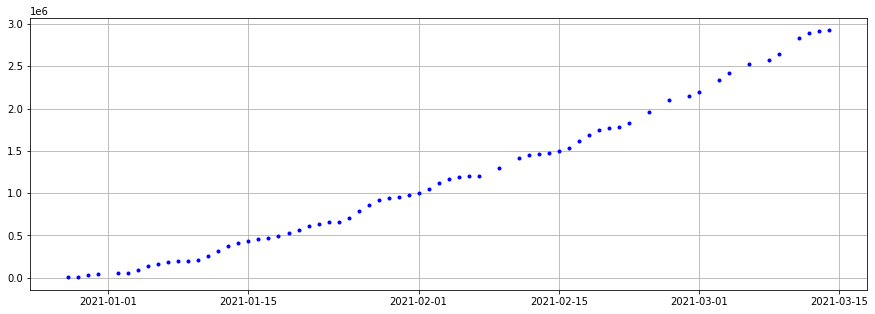




people_fully_vaccinated


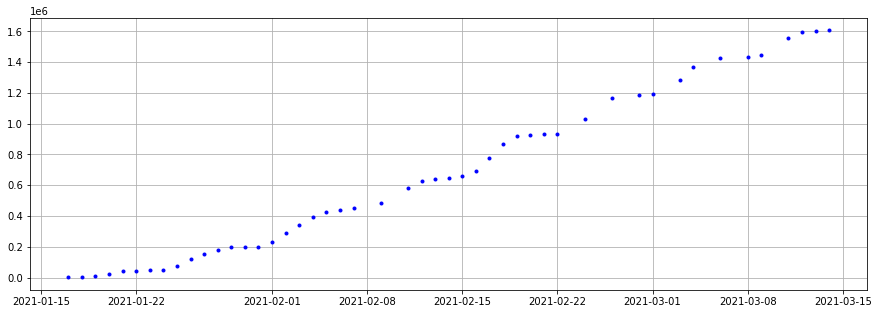




new_vaccinations


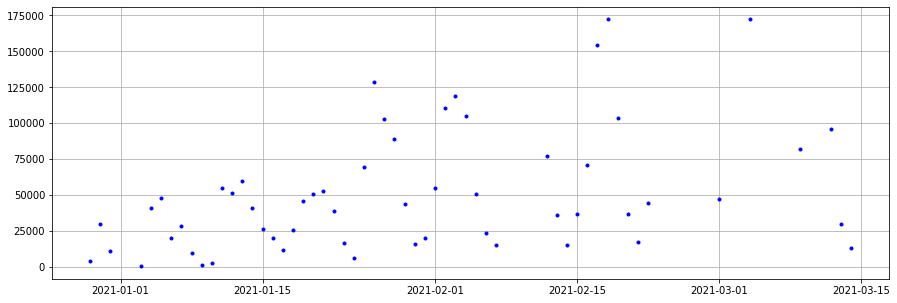




total_vaccinations_per_hundred


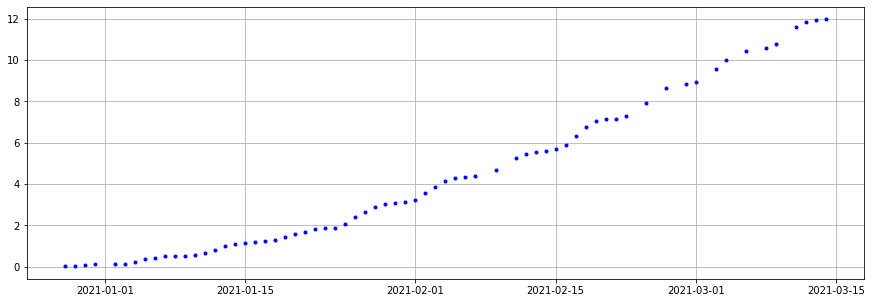




people_vaccinated_per_hundred


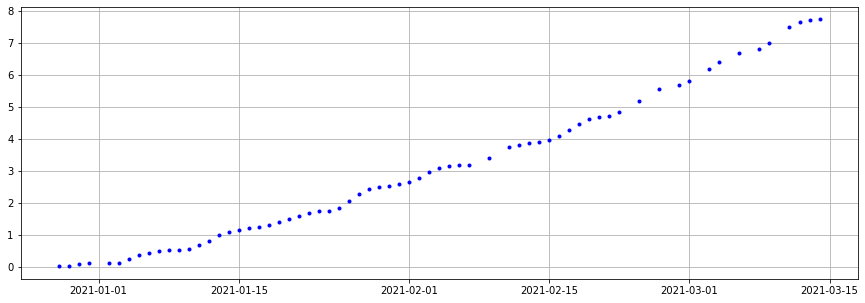




people_fully_vaccinated_per_hundred


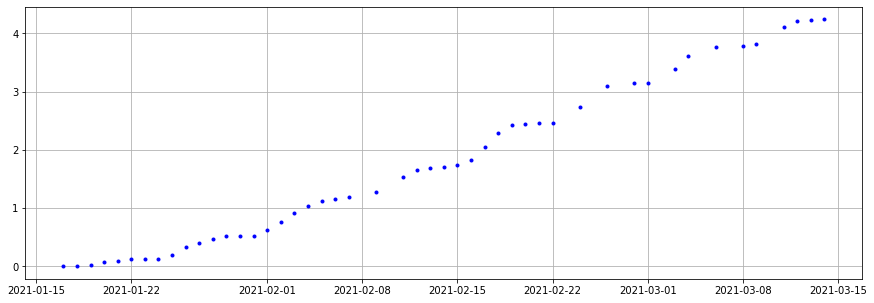

In [33]:
analyse_country(data, 'Poland')

In [42]:
def compare_countries(data, countries):
    data_countries = [(data[data['location']==country].drop('location', axis=1), country) for country in countries]
    for c in data_countries[0][0].columns:
        print(c)
        plt.figure(figsize=(15,5))
        for data, country in data_countries: 
            plt.plot(data[c], '.', label=country)
        plt.grid()
        plt.legend()
        plt.show()
        print('\n\n')

total_cases


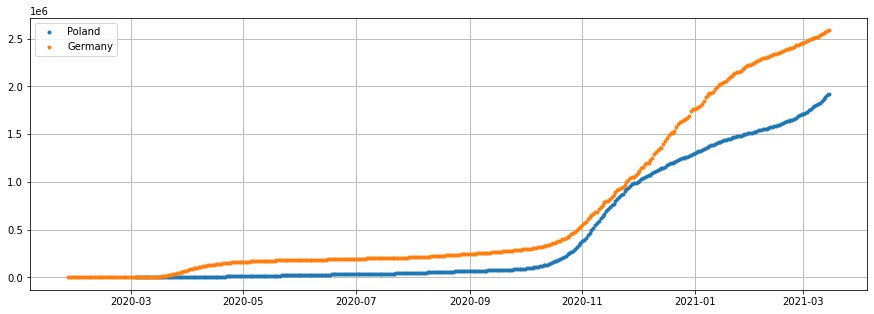




new_cases


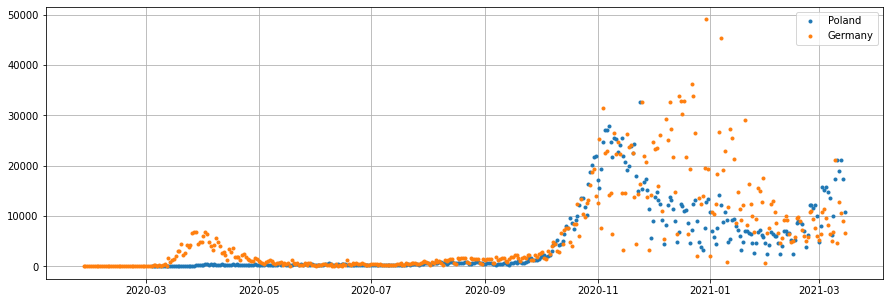




total_deaths


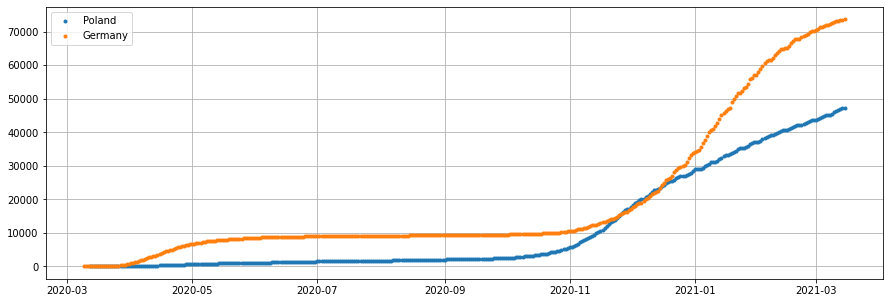




new_deaths


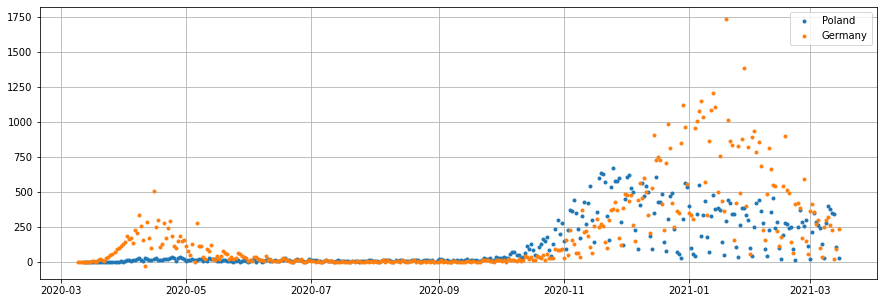




total_cases_per_million


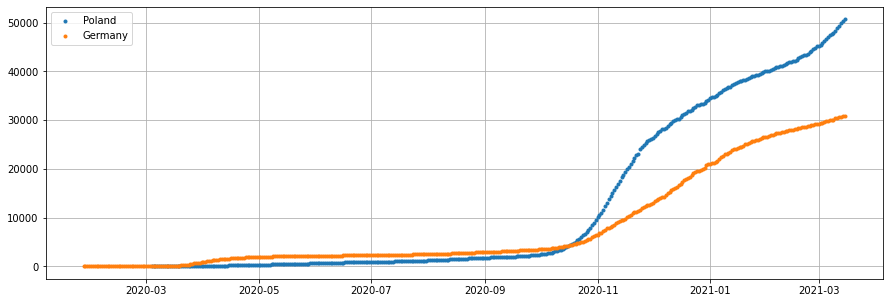




new_cases_per_million


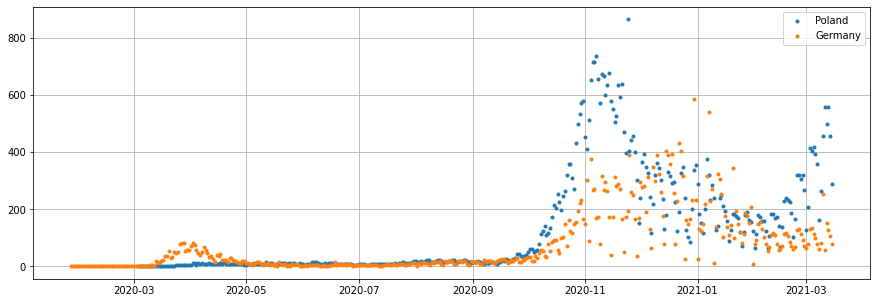




total_deaths_per_million


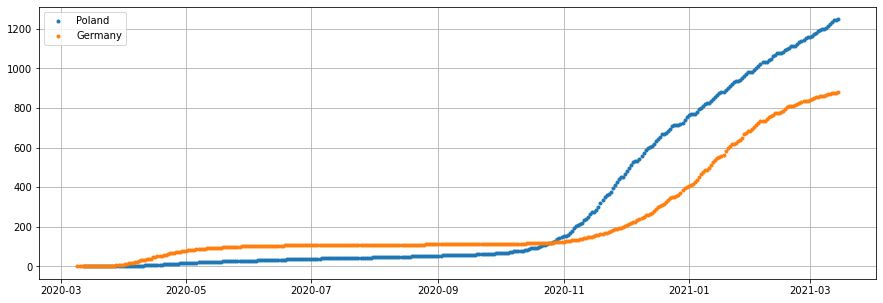




new_deaths_per_million


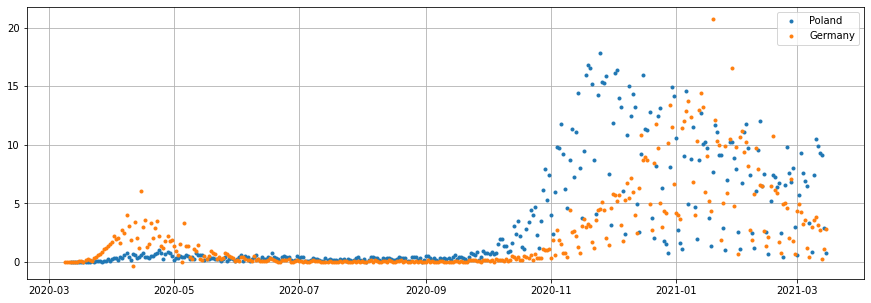




weekly_hosp_admissions


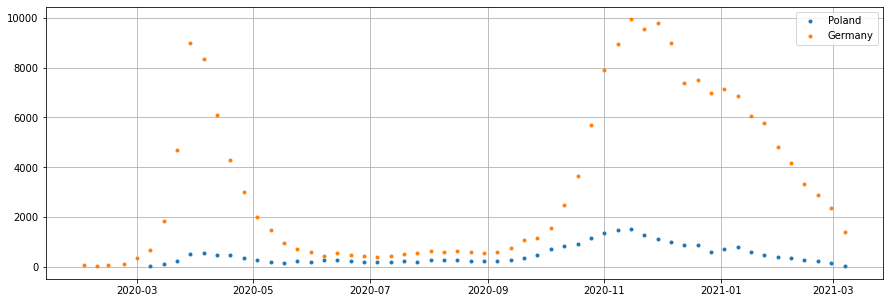




weekly_hosp_admissions_per_million


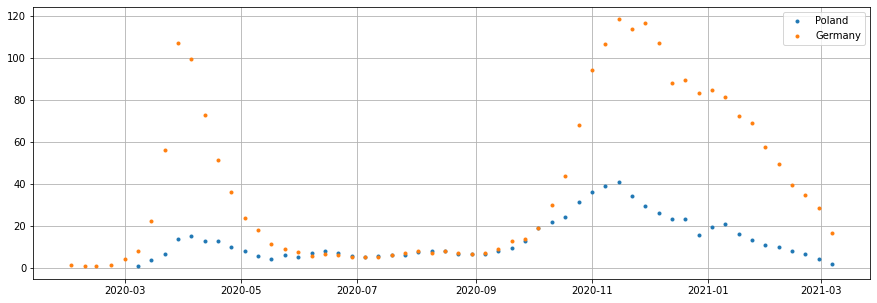




new_tests


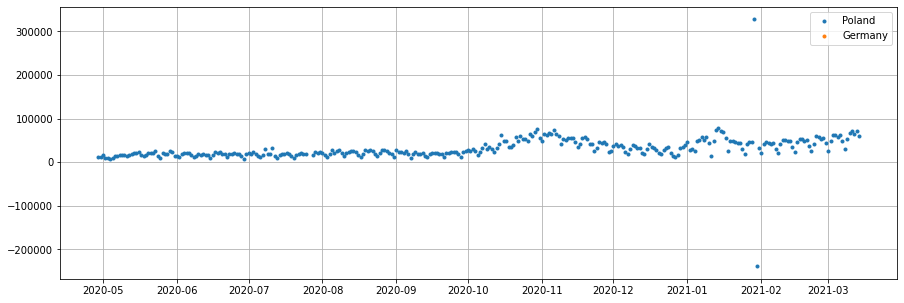




total_tests


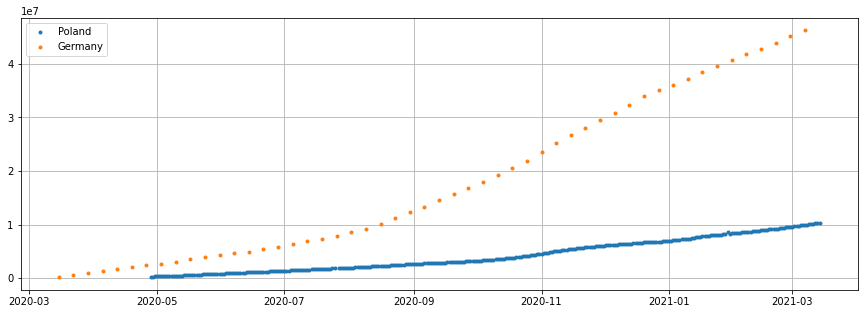




total_tests_per_thousand


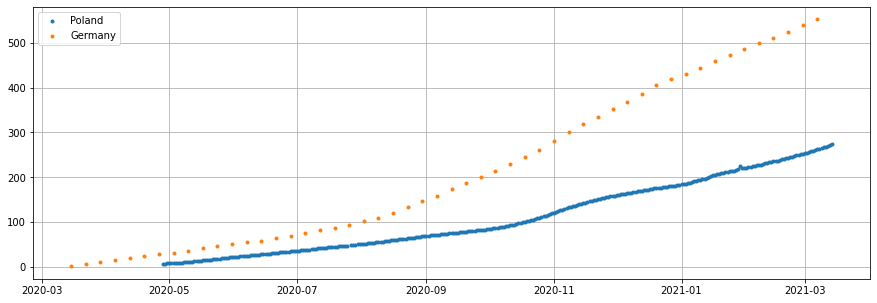




new_tests_per_thousand


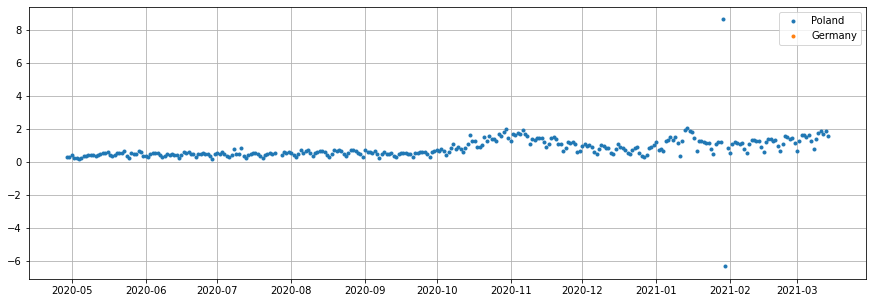




positive_rate


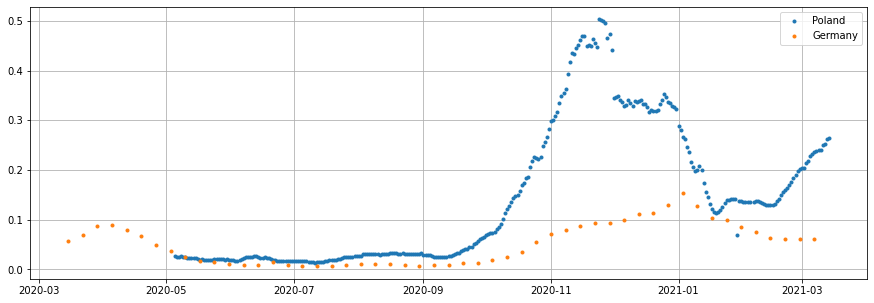




tests_per_case


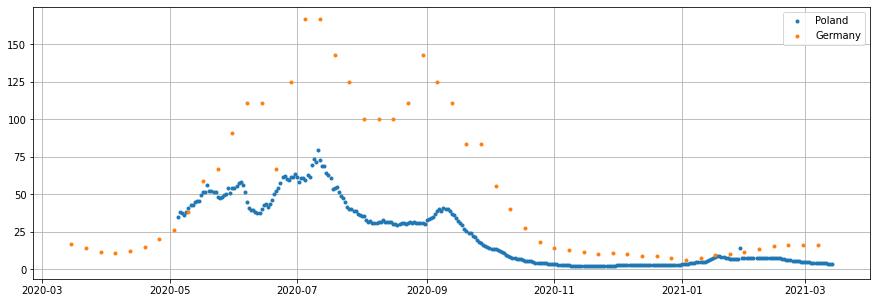




total_vaccinations


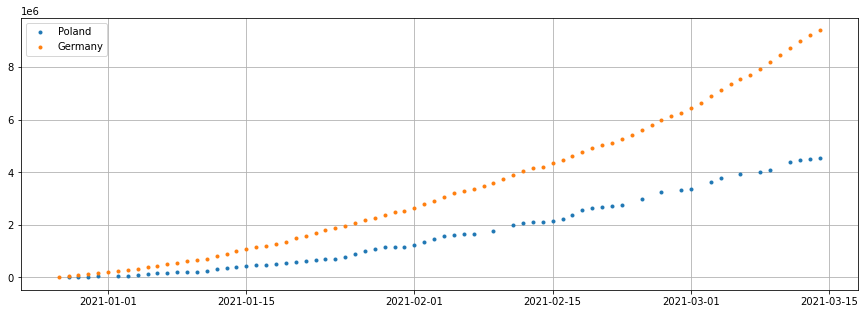




people_vaccinated


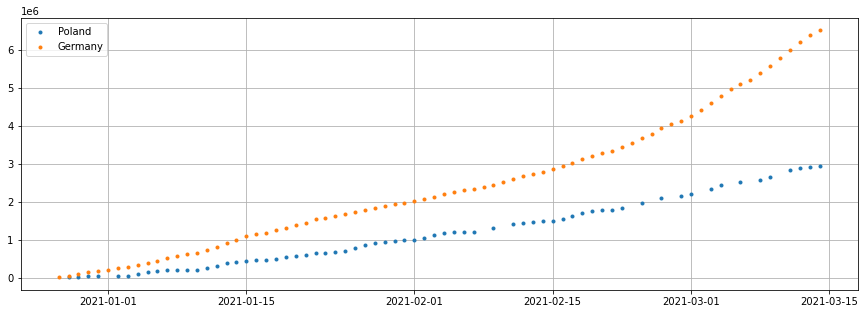




people_fully_vaccinated


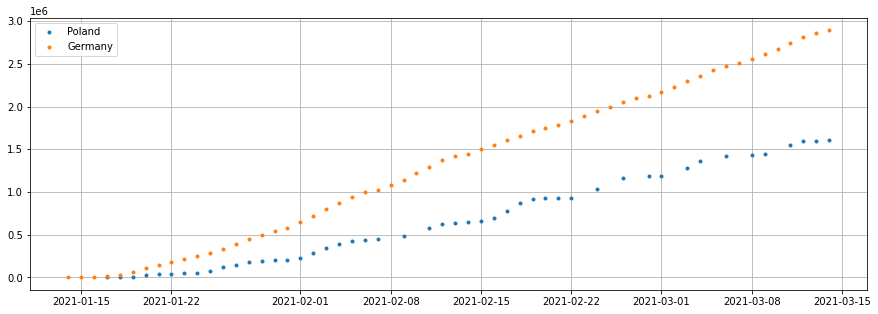




new_vaccinations


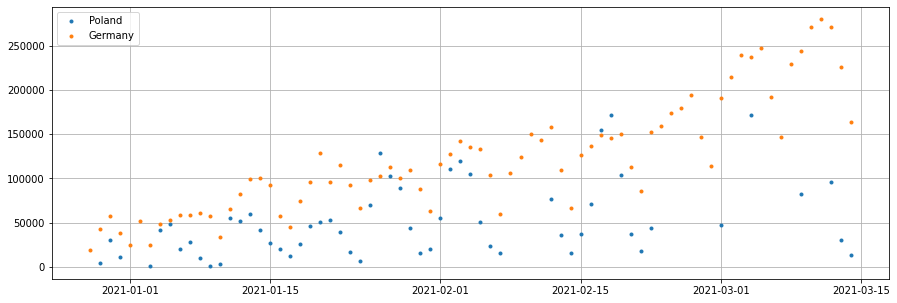




total_vaccinations_per_hundred


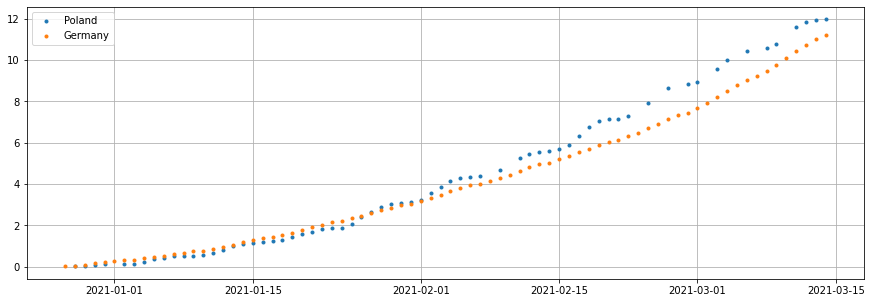




people_vaccinated_per_hundred


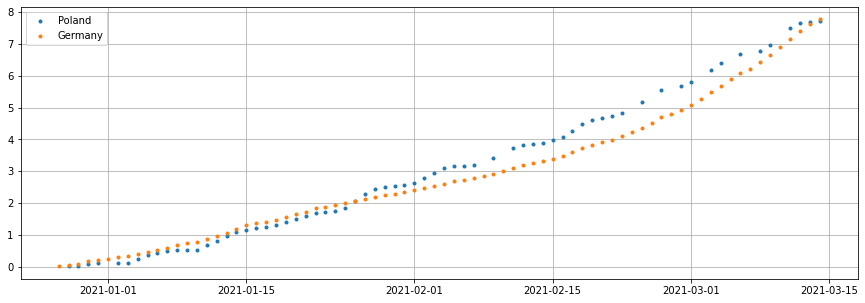




people_fully_vaccinated_per_hundred


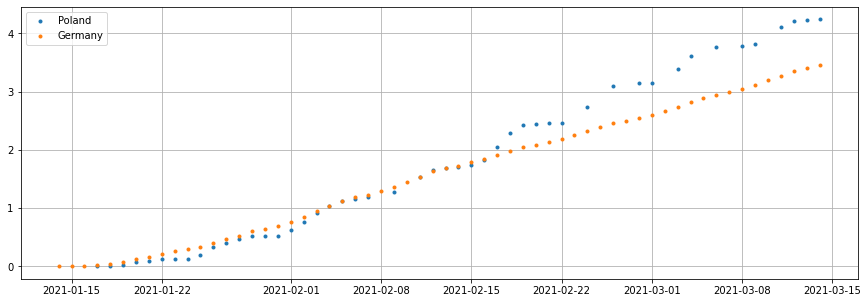

In [43]:
compare_countries(data, ['Poland', 'Germany'])